In [90]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

import matplotlib.pyplot as plt

In [91]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/german-credit")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\lucia\.cache\kagglehub\datasets\uciml\german-credit\versions\1


In [92]:
data = pd.read_csv(os.path.join(path,'german_credit_data.csv'))

In [93]:
import numpy as np

# Ejemplo: aleatorio
data["Risk"] = np.random.choice(["good","bad"], size=len(data))

# O con una regla sencilla
data["Risk"] = np.where((data["Credit amount"] > 5000) & (data["Duration"] > 36), "bad", "good")


In [94]:
print(data.head())
print(data.shape)
print(data["Risk"].value_counts())

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment   bad  
4           4870        24                  car  good  
(1000, 11)
Risk
good    938
bad      62
Name: count, dtype: int64


In [95]:
# --- Target ---
target = 'Risk'

# Mapear etiquetas a binario
data[target] = data[target].map({'good': 1, 'bad': 0})

# --- Features ---
features = ['Age', 'Job', 'Credit amount', 'Duration']

# --- X e y ---
X = data[features].values
y = data[target].values

In [103]:
def sigmoid(z):
    z = np.asarray(z, dtype=float)   # asegura que sea numpy array de floats
    return 1 / (1 + np.exp(-z))


In [97]:
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X], axis=1)  # X ahora tiene n+1 columnas

In [98]:
def calcularCosto(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

In [99]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))

    return theta, J_history

In [100]:
alpha = 0.0001
num_iters = 10000
theta = np.zeros(n + 1)

theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

C:\Users\lucia\AppData\Local\Temp\ipykernel_8980\2791904048.py:4: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\lucia\AppData\Local\Temp\ipykernel_8980\1225949884.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


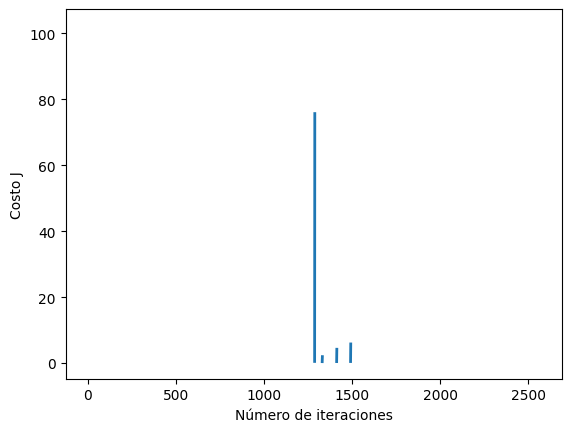

Theta calculado por descenso por gradiente: [0.07631763 2.39793242 0.13911424 0.17766928 0.18258247]


In [101]:
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.show()

print('Theta calculado por descenso por gradiente:', theta)

In [102]:
X_sample = np.array([1, 120, 30, 45, 0.5])
prediccion = sigmoid(np.dot(X_sample, theta))
print('Probabilidad de diabetes para este paciente: {:.2f}'.format(prediccion))

Probabilidad de diabetes para este paciente: 1.00
